
<center><h2>Actividad 1</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Matias Aedo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>

## 1. Crea tu perfil y un repositorio para las actividades del curso en Github
<p align="justify">
Tanto en el mercado laboral como a nivel de investigación científica, se ha normalizado el uso de herramientas de desarrollo continuo (CI/CD), entre las que se cuenta a GitHub. 

<p align="justify">
Debes crear tu cuenta y primer repositorio en GitHub. 

El respositorio deberá tener un archivo README y subcarpetas para las actividades del semestre. Allí deberás alojar el archivo de Jupyter Notebook con el código y todos los recursos para la posterior revisión de tu trabajo.
    
Este medio será el canal de entrega de tus actividades cada semana, de tal forma que al final del curso debes tener un portafolio de tu trabajo para presentar a tus colegas o en la industria.
    
    

In [ ]:
# Carpiincho
# https://github.com/Carpiincho/EIE_401

## 2. Define en python vectores y funciones
<p align="justify">
Debes generar vectores que representan intervalos de tiempo o de una variable.
Debes ingresar las funciones matemáticas y evaluarlas en los vectores generados.

$$
f(x) =  e^{-x^2} 
$$

$$
f(z) =  ysin(x) 
$$

<p align="justify">
Haz una gráfica para cada uno de las funciones evaluadas.
    
    

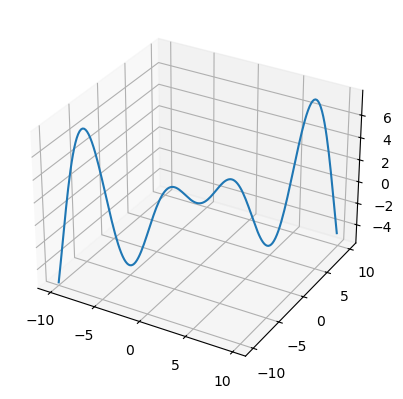

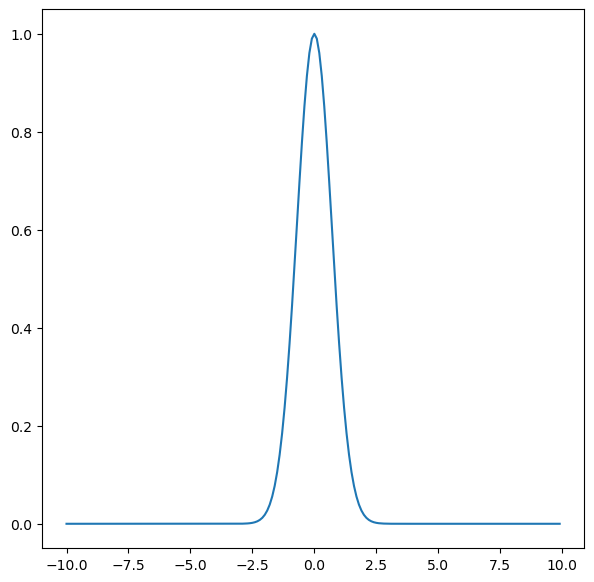

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#Arreglos
x=np.arange(-10,10,0.1)
y=np.arange(-10,10,0.1)
#Funciones
f1= np.exp(-x**2)
fz=y*np.sin(x)
#Ejes
ax1=plt.axes(projection="3d")
ax=plt.subplots(figsize=(7,7), nrows=1, ncols=1)

plt.plot(x,f1)
ax1.plot(x,y,fz)
plt.show(2)


## 3. Ruido
<p align="justify">
Crear una señal (senoidal, cosenoidal, etc) y demuestra la agregación de ruido.
    


### 3.1 Ruido Gaussiano
Debes agregar la señal de ruido a la que creaste previamente. Adicionalmente, debes mostrar una gráfica con el resultado.


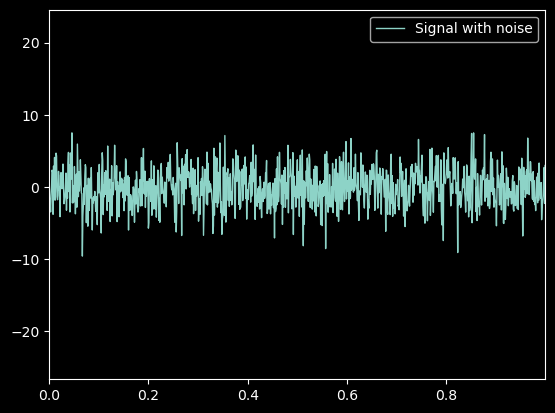

In [10]:
import matplotlib.pyplot as plt
import numpy as np
#se crea la señal y el espacio
t      = np.arange(start=0,stop=1,step=0.001)
Sin        = np.sin(2*np.pi*54*t)

## se crea el reuido
noise           = 2.5*np.random.randn(len(t))
noiseSignal     = Sin + noise

## se grafica la señal
plt.plot(t,noiseSignal,linewidth=1,label="Signal with noise")
plt.margins(x=0, y=1)
plt.legend()
plt.show()

### 3.2 Ruido Rosa
Investiga en que consiste el ruido rosa, cual es la diferencia del ruido gaussiano y demuéstralo.

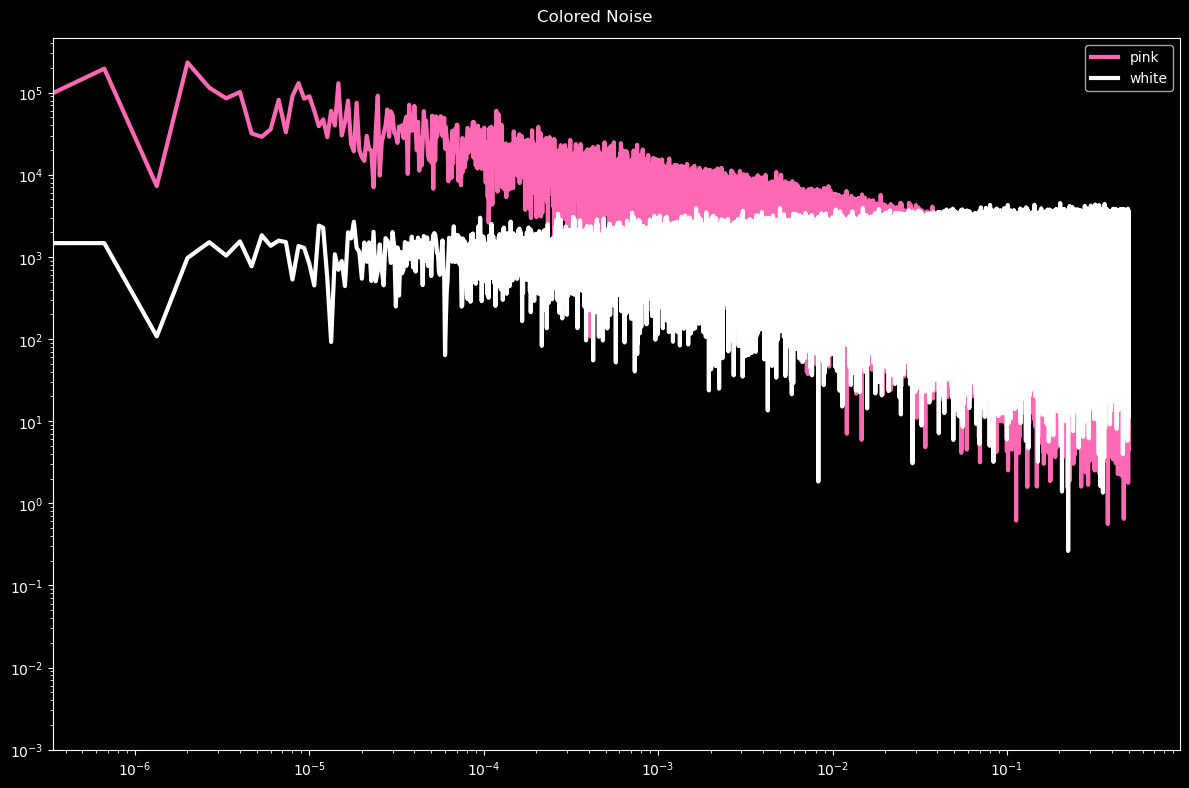

In [14]:
#El ruido rosa tiene una densidad espectral inversamente proporcional a la frecuencia en cuanto el ruido gauseano es completamente aletorio

import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]
def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N));
        S = psd(np.fft.rfftfreq(N))
        # Normalize S
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

plt.figure(figsize=(12, 8), tight_layout=True)
for G, c in zip(
        [pink_noise, white_noise], 
        ['hotpink', 'white']):
    plot_spectrum(G(30*50_000)).set(color=c, linewidth=3)
plt.legend(['pink', 'white'])
plt.suptitle("Colored Noise");
plt.ylim([1e-3, None]);

## 4. Referencias
<p align="justify">
    
[Generate colors of noise in Python] https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python

[Generación de señales]https://medium.com/@martinkarlsson.io/fourier-transform-in-python-f15b3243ce9a

[Fourier Transform]https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

[SciPy] https://docs.scipy.org/doc/scipy/tutorial/fft.html

[Fourier con numpy] https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a